<a href="https://colab.research.google.com/github/JaynthReddy91/MachineLearning/blob/main/ML_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y)

def jaccard_similarity(x, y):
    # Assume x and y are binary vectors (0 or 1)
    intersection = np.sum(np.minimum(x, y))
    union = np.sum(np.maximum(x, y))
    return intersection / union
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Euclidean Distance:", euclidean_distance(x, y))
print("Manhattan Distance:", manhattan_distance(x, y))
print("Cosine Similarity:", cosine_similarity(x, y))

# For Jaccard similarity, use binary vectors
a = np.array([1, 0, 1, 1])
b = np.array([0, 1, 1, 0])
print("Jaccard Similarity:", jaccard_similarity(a, b))


Euclidean Distance: 5.196152422706632
Manhattan Distance: 9
Cosine Similarity: 0.9746318461970762
Jaccard Similarity: 0.25


[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


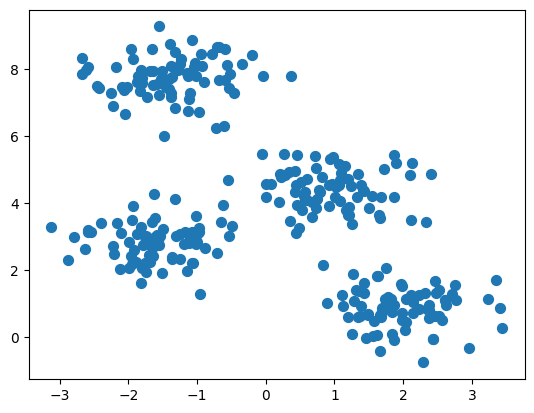

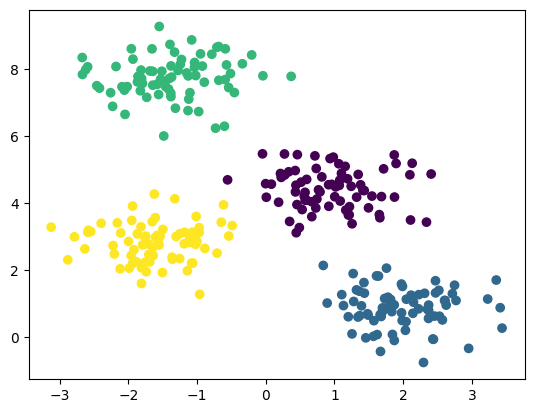

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
print(y)

# Plot the generated data
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Predict the cluster labels
y_pred = kmeans.predict(X)

# Plot the resulting clusters
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.show()


In [ ]:
pip install kneed


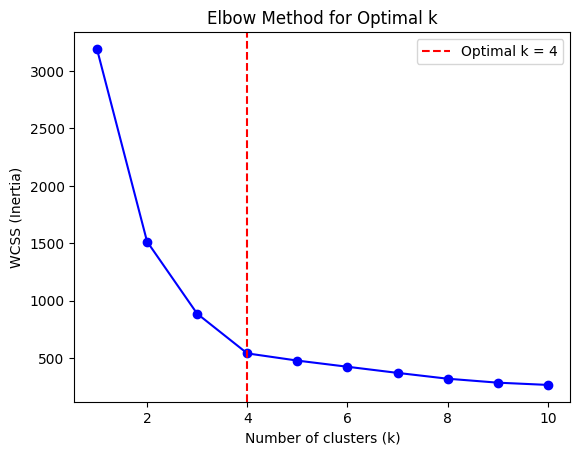

Optimal number of clusters: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator  # To automatically detect the elbow

def find_optimal_k(data, k_range=(1, 10), plot=False):
    wcss = []
    k_values = list(range(k_range[0], k_range[1] + 1))

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Inertia = WCSS

    # Use KneeLocator to find the elbow point
    kl = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")
    optimal_k = kl.elbow

    if plot:
        plt.plot(k_values, wcss, 'bo-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('WCSS (Inertia)')
        plt.title('Elbow Method for Optimal k')
        if optimal_k:
            plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
            plt.legend()
        plt.show()

    return optimal_k
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)

# Automatically find optimal k
k = find_optimal_k(X, k_range=(1, 10), plot=True)
print("Optimal number of clusters:", k)



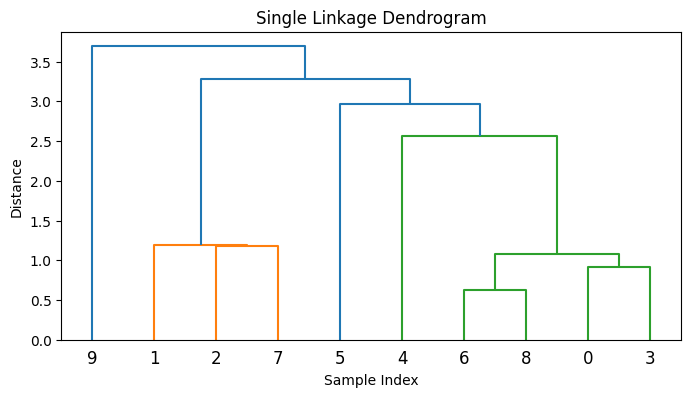

Cluster assignments: [2 1 1 2 2 3 2 1 2 4]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

# Step 1: Create synthetic data
X, _ = make_blobs(n_samples=10, centers=4, random_state=0)


# Step 2: Perform single linkage clustering
Z = linkage(X, method='single')  # 'single' for single linkage

# Step 3: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=np.arange(len(X)))
plt.title('Single Linkage Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Optional: Extract flat clusters from the hierarchy
# Example: Get 3 clusters
clusters = fcluster(Z, t=4, criterion='maxclust')
print("Cluster assignments:", clusters)


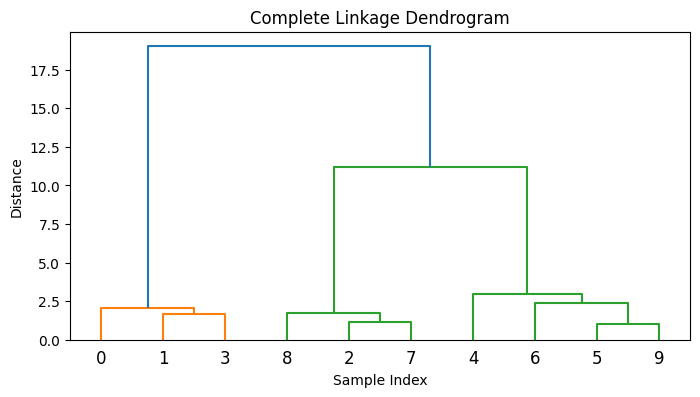

Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Step 2: Perform Complete Linkage clustering
Z = linkage(X, method='complete')  # 'complete' for complete linkage

# Step 3: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=np.arange(len(X)))
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step 4: Optionally extract clusters (e.g., 3 clusters)
clusters = fcluster(Z, t=3, criterion='maxclust')
print("Cluster assignments:", clusters)


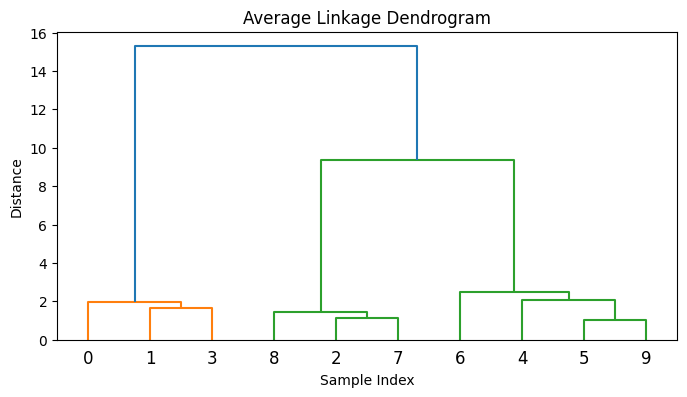

Average Linkage Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


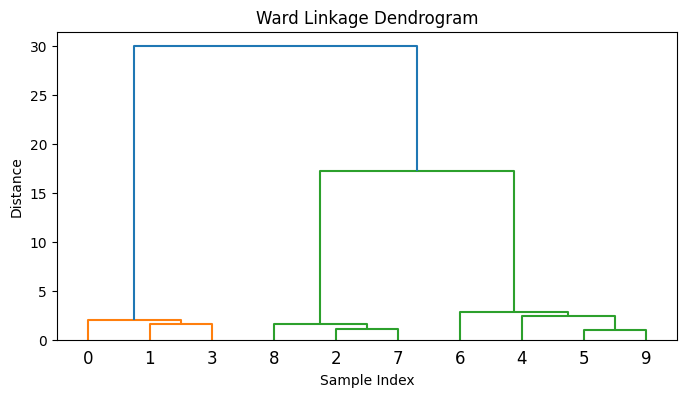

Ward Linkage Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

def plot_dendrogram(Z, title):
    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=np.arange(len(X)))
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Average Linkage
Z_avg = linkage(X, method='average')
plot_dendrogram(Z_avg, 'Average Linkage Dendrogram')

clusters_avg = fcluster(Z_avg, t=3, criterion='maxclust')
print("Average Linkage Cluster assignments:", clusters_avg)

# Ward Linkage
Z_ward = linkage(X, method='ward')
plot_dendrogram(Z_ward, 'Ward Linkage Dendrogram')

clusters_ward = fcluster(Z_ward, t=3, criterion='maxclust')
print("Ward Linkage Cluster assignments:", clusters_ward)


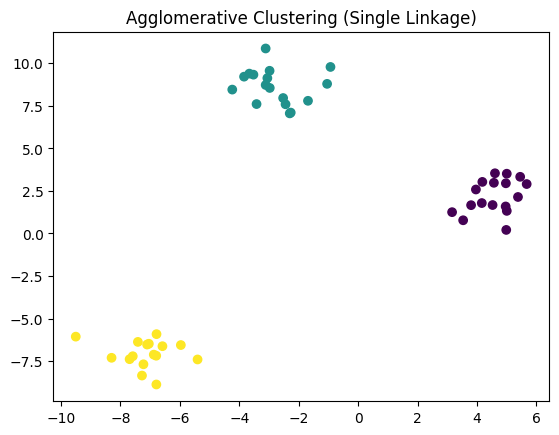

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def agglomerative_clustering(X, n_clusters=2, linkage='single'):
    # Initialize clusters: each point in its own cluster
    clusters = [[i] for i in range(len(X))]

    def cluster_distance(c1, c2):
        points_c1 = X[c1]
        points_c2 = X[c2]
        dist_matrix = cdist(points_c1, points_c2)

        if linkage == 'single':
            return np.min(dist_matrix)
        elif linkage == 'complete':
            return np.max(dist_matrix)
        elif linkage == 'average':
            return np.mean(dist_matrix)
        else:
            raise ValueError("Unsupported linkage type")

    while len(clusters) > n_clusters:
        min_dist = float('inf')
        pair_to_merge = None

        # Find closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i, j)

        i, j = pair_to_merge
        # Merge clusters i and j
        new_cluster = clusters[i] + clusters[j]

        # Remove old clusters and add new one
        clusters = [clusters[k] for k in range(len(clusters)) if k != i and k != j]
        clusters.append(new_cluster)

    # Prepare output: assign cluster labels to points
    labels = np.empty(len(X), dtype=int)
    for idx, cluster in enumerate(clusters):
        for point_index in cluster:
            labels[point_index] = idx

    return labels

# Example usage:
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_blobs

    X, _ = make_blobs(n_samples=50, centers=3, random_state=42)

    labels = agglomerative_clustering(X, n_clusters=3, linkage='single')

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("Agglomerative Clustering (Single Linkage)")
    plt.show()


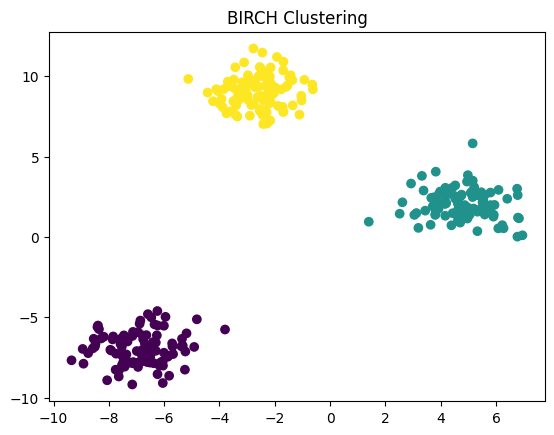

In [ ]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Create and fit BIRCH model
birch_model = Birch(n_clusters=3)
birch_model.fit(X)

# Predicted clusters
labels = birch_model.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()


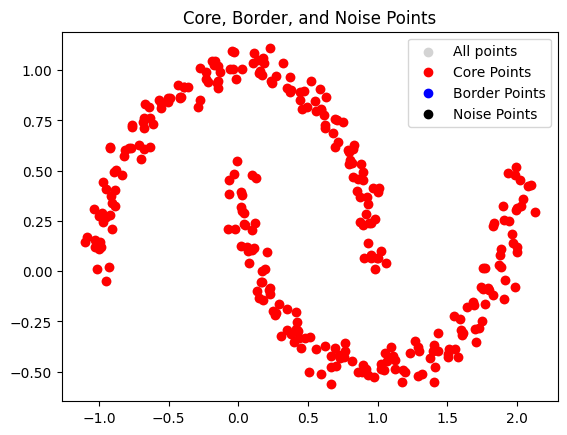

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def find_core_border_points(X, eps, min_samples):
    nbrs = NearestNeighbors(radius=eps).fit(X)
    # neighbors_indices: list of arrays, each contains indices within eps of point i
    neighbors_indices = nbrs.radius_neighbors(X, radius=eps, return_distance=False)

    core_points = []
    border_points = []
    noise_points = []

    # First determine core points
    is_core = np.zeros(len(X), dtype=bool)
    for i, neighbors in enumerate(neighbors_indices):
        if len(neighbors) >= min_samples:
            is_core[i] = True

    # Identify core, border, noise
    for i in range(len(X)):
        if is_core[i]:
            core_points.append(i)
        else:
            # Check if point is neighbor of any core point
            # i.e., if it lies within eps of a core point
            is_border = False
            for core_idx in core_points:
                # Since radius_neighbors indices may be large,
                # better to check distance instead of looping
                dist = np.linalg.norm(X[i] - X[core_idx])
                if dist <= eps:
                    is_border = True
                    break
            if is_border:
                border_points.append(i)
            else:
                noise_points.append(i)

    return core_points, border_points, noise_points

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_moons
    import matplotlib.pyplot as plt

    X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

    eps = 0.2
    min_samples = 5

    core_pts, border_pts, noise_pts = find_core_border_points(X, eps, min_samples)

    plt.scatter(X[:, 0], X[:, 1], c='lightgray', label='All points')
    plt.scatter(X[core_pts, 0], X[core_pts, 1], c='red', label='Core Points')
    plt.scatter(X[border_pts, 0], X[border_pts, 1], c='blue', label='Border Points')
    plt.scatter(X[noise_pts, 0], X[noise_pts, 1], c='black', label='Noise Points')
    plt.legend()
    plt.title("Core, Border, and Noise Points")
    plt.show()


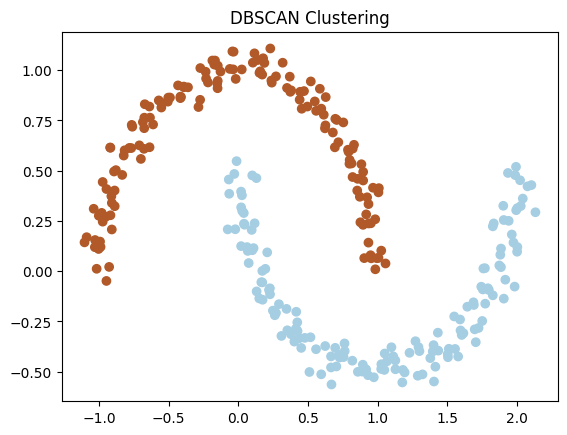

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data with noise
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Create DBSCAN model
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title('DBSCAN Clustering')
plt.show()
